#Getting Data

 Extracting data from github repo.

 Setting aside test set

 Analysing contents of data




In [ ]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
import numpy as np

def load_housing_data():
  #checks for file
  tarball_path = Path("datasets/housing.tgz")

  #if file not present makes directory called datasets
  if not tarball_path.is_file():
    Path("datasets").mkdir(parents=True,exist_ok=True)
    url ="https://github.com/ageron/data/raw/main/housing.tgz"
    #sends http request to github repo
    urllib.request.urlretrieve(url,tarball_path)

    #opens and downloads file at tarball_path
    with tarfile.open(tarball_path) as housing_tarball:
      housing_tarball.extractall(path="datasets")

  #converts CSV file to pandas df object and returns it
  return pd.read_csv(Path("datasets/housing/housing.csv"))

housing_data = load_housing_data()


In [ ]:
#retreives first 5 instances
housing_data.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
#retreives general schema
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
#retrieves number of categories in values
housing_data["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


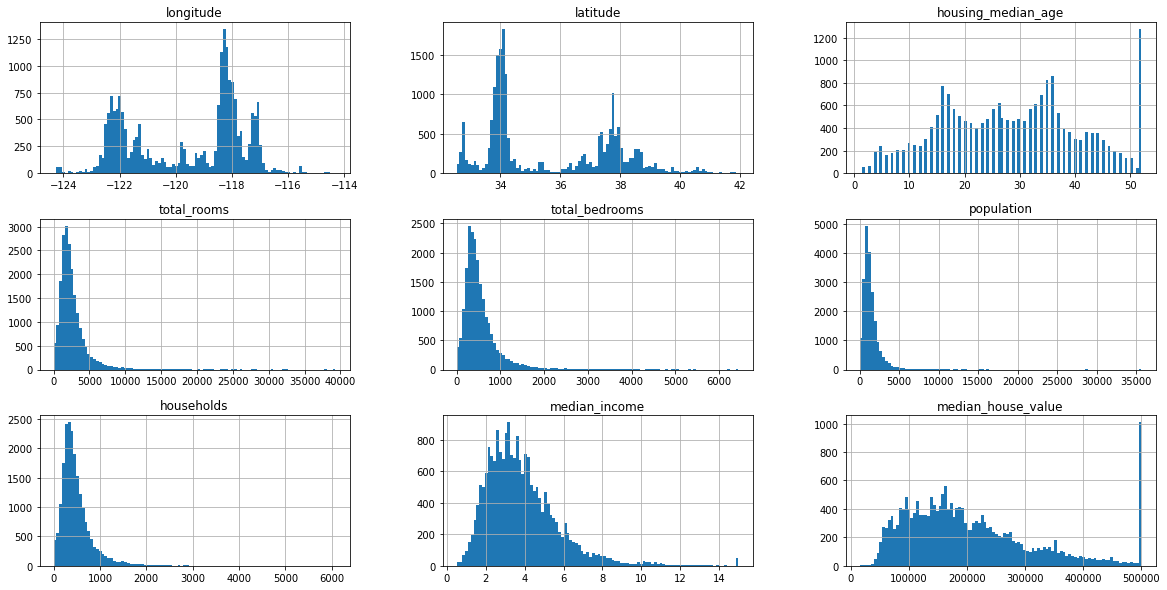

In [ ]:
import matplotlib.pyplot as plt
housing_data.hist(bins=100,figsize=(20,10))
plt.show()

#Test Set generation

Using Random Sampling
> Explicitly separating test and raining sets using hash functions and ids

Using Stratified Sampling


In [ ]:
#defining a function which takes array and test set ratio and returns random array
import numpy as np
def shuffled_test_train_data(data,test_set_ratio):
  #generate shuffled indices
  shuffled_indices = np.random.permutation(len(data))
  test_set_size = int(len(data)* test_set_ratio)
  #pick indices for test set
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  #returns two arrays with test data and train data
  return data.iloc[test_indices],data.iloc[train_indices]




In [ ]:
housing_data_with_id = housing_data.reset_index()#creates new coolumn index with old index values

In [ ]:
#to check if we want an instance in the test_set
from zlib import crc32
import numpy as np

#returns bool value (true if id last bit within test percent of datas)
def is_id_in_testset (identifier,test_ratio):
  return crc32(np.int64(identifier))< test_ratio * 2**32

#checks if every instance in id column is in test set,stores in array and splits data
def split_data_with_id_hash(data,test_ratio, identifier_column):
  #creates an array of id column values
  ids = data[identifier_column]
  #applys is_id... to each memeber of ids and passes to boolean array
  ids_in_test_set = ids.apply(lambda each_id : is_id_in_testset(each_id,test_ratio) )
  #if false puts in train set otherwise in test
  return data.loc[~ids_in_test_set],data.loc[ids_in_test_set]


train_set , test_set = split_data_with_id_hash(housing_data_with_id,0.2,"index")



Using scikit-learn to split datasets

> train_test_split() method takes data,test_size,train_size,random_state(aka seed value),shuffle


In [ ]:
from sklearn.model_selection import train_test_split

train_set , test_set = train_test_split(housing_data_with_id,test_size=0.2,random_state=76)


Stratified Sampling

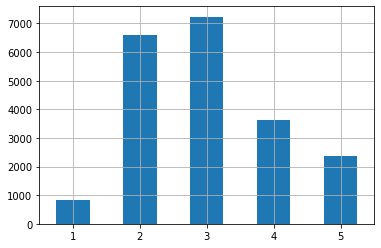

In [ ]:
#to visualise strata in the data
import matplotlib.pyplot as plt

housing_data["income_categories"] = pd.cut(housing_data["median_income"],
                                           bins = [0,1.5,3.0,4.5,6.0,np.inf],
                                           labels = [1,2,3,4,5])

housing_data["income_categories"].value_counts().sort_index().plot.bar(rot =0, grid =True)
plt.xlabel = ("Income Category")
plt.ylabel = ("Number of Districts")
plt.show()

In [ ]:
#Using sklearn
from sklearn.model_selection import StratifiedShuffleSplit as sss

splitter = sss(n_splits = 10, test_size = 0.2 , random_state = 42)
strat_splits = []
for train_index , test_index in splitter.split(housing_data , housing_data["income_categories"]):
  strat_train_set_n = housing_data.iloc[train_index]
  strat_test_set_n = housing_data.iloc[test_index]
  strat_splits.append([strat_train_set_n , strat_test_set_n])

strat_train_set , strat_test_set = strat_splits[0]



strat sampling using train_test_split and stratify argument

In [ ]:
from sklearn.model_selection import train_test_split
strat_train_set , strat_test_set = train_test_split(housing_data,
                                                    test_size = 0.2,
                                                    stratify = housing_data["income_categories"],
                                                    random_state = 42)


In [ ]:
#to check income category proportions
strat_test_set["income_categories"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_categories, dtype: float64

In [ ]:
for a in (strat_train_set , strat_test_set):
  a.drop("income_categories",axis= 1, inplace =True)


#Exploring the data

In [ ]:
housing_data = strat_train_set.copy()

**Geographical data**

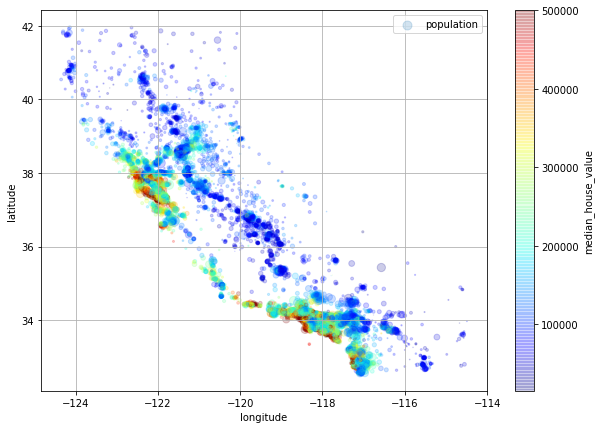

In [ ]:
import matplotlib.pyplot as plt
housing_data.plot(kind ="scatter" ,
                  x = "longitude" ,
                  y = "latitude",
                  grid = True ,
                  alpha = 0.2 , #alpha sets opacity, the denser the darker
                  s = housing_data["population"]/100,#sets radius of dot
                  label = "population",
                  c = "median_house_value" ,# c is the color
                  cmap = "jet" , #cmap is predefined color map ,jet is blue to red
                  colorbar = True,
                  legend = True,
                  sharex = False,#shared x axis parameter
                  figsize = (10,7) #length in inches
                  )
plt.show()

** Looking for correlations**

In [ ]:
#calculate Pearson's r or standard correlation coeff
corr_matrix = housing_data.corr()

#correlation between median income and each attribute
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

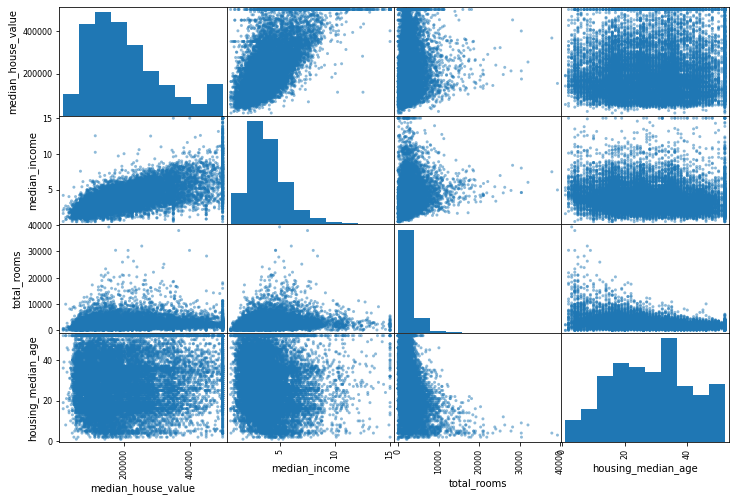

In [ ]:
#correlation using pandas scatter_matrix

from pandas.plotting import scatter_matrix#scatter matrix plots every numeric attribute against every other num att

attributes = ["median_house_value","median_income", "total_rooms", "housing_median_age"]

scatter_matrix(housing_data[attributes] , figsize =(12,8))

plt.show()

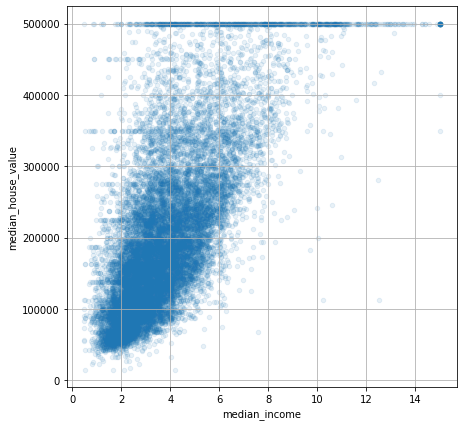

In [ ]:
housing_data.plot(kind = "scatter",x="median_income", y ="median_house_value",alpha = 0.1,grid = True,figsize =(7,7 ))
plt.show()

#Preparing the data

In [ ]:
#seperate predictors and labels
housing_data = strat_train_set.drop("median_house_value", axis =1)
housing_data_labels =  strat_train_set["median_house_value"].copy()


**Deal with missing features using pandas**

Getting rid of corresponding districts
```
housing_data.dropna(subset=["total_bedrooms"] , inplace=True)
```
Getting rid of whole attribute
```
housing_data.drop("total_bedrooms",axis =1)
```

Setting a value for missing value(**IMPUTATION**)
```
median = housing_data["total_bedrooms"].median()
housing_data["total_bedrooms"].fillna(median,inplace=True)




In [ ]:
#using scikit class SimpleImputer
from sklearn.impute import SimpleImputer
#instantiate imputer
imputer = SimpleImputer(strategy ="median")

#imputeronly works on numeric attributes
housing_data_only_num = housing_data.select_dtypes(include =[np.number])

imputer.fit(housing_data_only_num)

imputer.statistics_

X = imputer.transform(housing_data_only_num)#this returns only a numpy array orScipy sparse matrices

housing_data_tr = pd.DataFrame(X,columns = housing_data_only_num.columns,index = housing_data_only_num.index)#wraps numpy array to a df






Categorical attributes

In [ ]:
housing_cat = housing_data[["ocean_proximity"]]

#converting the categorical attribute to numeric attribute
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)#

housing_cat_encoded[:10]
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

#one-hot encoding

Using pandas function
```
>>>df_test = pd.DataFrame({"ocean_proximity": ["INLAND", "NEAR BAY"]})
>>>pd.get_dummies(df_test)

ocean_proximity_INLAND ocean_proximity_NEAR BAY
0                    1                        0
1                    0                        1

```

In [ ]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()  #sparse = False to automatically convert to nd array
housing_cat_onehot_enc = cat_encoder.fit_transform(housing_cat )

housing_cat_onehot_enc#in sparse matrix form
housing_cat_onehot_enc.toarray()  #converting sparse matrix to 2d array

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

#Feature Scaling and Transformations
  


Normalisation or Min-Max Scaling

In [ ]:
#x-min value/range

from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler(feature_range =(-1,1))
housing_data_only_num_scaled_min_max = mm_scaler.fit_transform(housing_data_only_num)

Standardisation

In [ ]:
#x-mean/SD

from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
housing_data_only_num_std_scaled = std_scaler.fit_transform(housing_data_only_num)

Transforming Multi-Modal features using RBF-Radial Basis Function

In [ ]:
#Gaussian RBF
from sklearn.metrics.pairwise import rbf_kernel
age_similar_35 = rbf_kernel(housing_data[["housing_median_age"]],[[35]], gamma =0.1)

Custom Transformers

In [ ]:
#log transformer for power law feature
from sklearn.preprocessing import FunctionTransformer
log_transformer = FunctionTransformer(np.log,#transformation on training data
                                      inverse_func = np.exp)#inverse transformation
log_pop = log_transformer.transform(housing_data[["population"]])



In [ ]:
#transformer for two attributes
sf_coords = 37.7749 , -122.41
sf_transformer = FunctionTransformer(rbf_kernel,
                                     kw_args=dict(Y=[sf_coords],gamma=0.1))
sf_simil = sf_transformer.transform(housing_data[["latitude","longitude"]])


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):  # no *args or **kwargs!
        self.with_mean = with_mean

    def fit(self, X, y=None):  # y is required even though we don't use it
        X = check_array(X)  # checks that X is an array with finite float values
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1]  # every estimator stores this in fit()
        return self  # always return self!

    def transform(self, X):
        check_is_fitted(self)  # looks for learned attributes (with trailing _)
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_

In [ ]:
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [ ]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
similarities = cluster_simil.fit_transform(housing_data[["latitude", "longitude"]],
                                           sample_weight=housing_data_labels)

Trnsformation Pipelines


In [ ]:
from sklearn .pipeline import Pipeline
#takes list of estimator pairs
num_pipeline = Pipeline([
    ("impute",SimpleImputer(strategy = "median")),
    ("standardize",StandardScaler()),
])


In [ ]:
#without names
from sklearn.pipeline import make_pipeline
num_pipeline = make_pipeline (SimpleImputer(strategy="median"),StandardScaler())

In [ ]:

housing_num_prepared = num_pipeline.fit_transform(housing_data_only_num)
housing_num_prepared[:2].round(2)

## doubt


array([[-1.42,  1.01,  1.86,  0.31,  1.37,  0.14,  1.39, -0.94],
       [ 0.6 , -0.7 ,  0.91, -0.31, -0.44, -0.69, -0.37,  1.17]])

Column Transformerer


In [ ]:

from sklearn.compose import ColumnTransformer

num_attributes = ["longitude",	"latitude",	"housing_median_age",	"total_rooms",	"total_bedrooms",	"population"	,"households","median_income"]

cat_attributes = ["ocean_proximity"]

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preprocessing= ColumnTransformer([
    ("num", num_pipeline,num_attributes),
    ("cat",cat_pipeline , cat_attributes)
])

In [ ]:
housing_processed = preprocessing.fit_transform(housing_data)#returns numpy arrayy


In [ ]:
from sklearn.compose import make_column_selector
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio,),
        StandardScaler())

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log),
    StandardScaler())
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())
preprocessing = ColumnTransformer([
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
        ("people_per_house", ratio_pipeline(), ["population", "households"]),
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
        ("geo", cluster_simil, ["latitude", "longitude"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline)  # one column remaining: housing_median_age

In [ ]:
housing_processed = preprocessing.fit_transform(housing_data)
housing_processed.shape

(16512, 24)

In [ ]:
preprocessing.get_feature_names()

###doubt

#Model Selection and Training

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing,LinearRegression())

lin_reg.fit(housing_data,housing_data_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(func=<function column_ratio at 0x7f38c094a680>)...
                                                   'median_income']),
                                                 ('geo',
                    

In [ ]:
housing_predictions = lin_reg.predict(housing_data)
housing_predictions[:5].round(-2)


array([243700., 372400., 128800.,  94400., 328300.])

In [ ]:
housing_data_labels[:5].values

array([458300., 483800., 101700.,  96100., 361800.])

In [ ]:
from sklearn.metrics import mean_squared_error
lin_rmse = mean_squared_error(housing_data_labels, housing_predictions,squared = False)
lin_rmse

68687.89176590038

Using a Decision Tree Regressor because the model is underfitted

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing,
                         DecisionTreeRegressor(random_state=42,))
tree_reg.fit(housing_data,housing_data_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(func=<function column_ratio at 0x7f38c094a680>)...
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude'

In [ ]:
housing_predictions = tree_reg.predict(housing_data)
tree_rmse = mean_squared_error(housing_data_labels , housing_predictions,
                               squared =False)
tree_rmse

0.0

Using cross-validation since model is overfit

In [ ]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg,
                             housing_data,
                             housing_data_labels,
                             scoring = "neg_root_mean_squared_error",
                             cv =10)
pd.Series(tree_rmses).describe()

count       10.000000
mean     66868.027288
std       2060.966425
min      63649.536493
25%      65338.078316
50%      66801.953094
75%      68229.934454
max      70094.778246
dtype: float64

Using RandomForestRegressor


In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing,
                           RandomForestRegressor(random_state=42))

forest_rmses = -cross_val_score(forest_reg,
                                housing_data,
                                housing_data_labels,
                                scoring ="neg_root_mean_squared_error",
                                cv = 10)

In [ ]:
pd.Series(forest_rmses).describe()

count       10.000000
mean     47019.561281
std       1033.957120
min      45458.112527
25%      46464.031184
50%      46967.596354
75%      47325.694987
max      49243.765795
dtype: float64

#Fine-tuning


Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing" , preprocessing),
    ("random_forest" , RandomForestRegressor(random_state=42)),

])

param_grid = [
    {'preprocessing__geo__n_clusters': [5, 8, 10],
     'random_forest__max_features': [4, 6, 8]},
    {'preprocessing__geo__n_clusters': [10, 15],
     'random_forest__max_features': [6, 8, 10]},
]
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
scoring='neg_root_mean_squared_error')
grid_search.fit(housing_data, housing_data_labels)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                               

In [ ]:
grid_search.best_params_

{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}

In [ ]:
cv_results = pd.DataFrame(grid_search.cv_results_)

cv_results.sort_values(by = "mean_test_score", ascending =False, inplace =True)

cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing__geo__n_clusters,param_random_forest__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
12,6.270818,0.540219,0.187970,0.005196,15,6,"{'preprocessing__geo__n_clusters': 15, 'random...",-43459.598047,-43918.632694,-44747.781772,-44042.004171,533.085183,1
13,7.290310,0.123682,0.182579,0.002255,15,8,"{'preprocessing__geo__n_clusters': 15, 'random...",-44132.027207,-44075.251239,-45009.672809,-44405.650418,427.736807,2
14,14.831695,2.787209,0.240127,0.047731,15,10,"{'preprocessing__geo__n_clusters': 15, 'random...",-44374.325167,-44285.549219,-45316.375999,-44658.750128,466.421934,3
7,7.480357,0.444312,0.251288,0.005621,10,6,"{'preprocessing__geo__n_clusters': 10, 'random...",-44683.355320,-44654.825561,-45657.384730,-44998.521871,466.031964,4
9,6.215187,0.269588,0.198357,0.021580,10,6,"{'preprocessing__geo__n_clusters': 10, 'random...",-44683.355320,-44654.825561,-45657.384730,-44998.521871,466.031964,4


Randomised Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
    'preprocessing__geo__n_clusters': randint(low=3,high=50),
    'random_forest__max_features': randint(low=2,high =20)
}

rnd_search =RandomizedSearchCV(
    full_pipeline , param_distribs , n_iter=10,cv=3,
    scoring = 'neg_root_mean_squared_error' , random_state = 42
)

rnd_search.fit(housing_data , housing_data_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
   

Ranking the attributes

In [ ]:
final_model = rnd_search.best_estimator_
feature_importances  = final_model["random_forest"].feature_importances_
feature_importances.round(2)

array([0.07, 0.05, 0.05, 0.01, 0.01, 0.01, 0.01, 0.19, 0.04, 0.01, 0.  ,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.01, 0.01, 0.01, 0.  , 0.01,
       0.01, 0.01, 0.01, 0.01, 0.  , 0.  , 0.02, 0.01, 0.01, 0.01, 0.02,
       0.01, 0.  , 0.02, 0.03, 0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.01,
       0.01, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.01, 0.  , 0.07,
       0.  , 0.  , 0.  , 0.01])

Test Set

In [ ]:
X_test = strat_test_set.drop("median_house_value" , axis=1)
Y_test = strat_test_set["median_house_value"].copy()

final_predictions = final_model.predict(X_test)

final_rmse = mean_squared_error(Y_test, final_predictions, squared=False)

print(final_rmse)


41424.40026462184


In [ ]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions -Y_test)**2
np.sqrt(stats.t.interval(confidence,len(squared_errors)-1,
                         loc=squared_errors.mean(),
                         scale = stats.sem(squared_errors)))

array([39275.40861216, 43467.27680583])

#Launch

In [ ]:
import joblib

joblib.dump(final_model , "my_california_housing_model.pkl")

['my_california_housing_model.pkl']

In [ ]:
import joblib

# extra code – excluded for conciseness
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics.pairwise import rbf_kernel

def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

#class ClusterSimilarity(BaseEstimator, TransformerMixin):
#    [...]

final_model_reloaded = joblib.load("my_california_housing_model.pkl")

new_data = housing_data.iloc[:5]  # pretend these are new districts
predictions = final_model_reloaded.predict(new_data)

In [ ]:
predictions

array([442737.15, 457566.06, 105965.  ,  98462.  , 332992.01])